<a href="https://colab.research.google.com/github/KeziahAcheampong/Keziah_A/blob/main/week6_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# This line imports matplotlib's pyplot module, which we use to create graphs and visualizations
# We use the alias 'plt' because it is the standard convention in Python
import matplotlib.pyplot as plt

# This imports pandas, which we use to load and work with datasets
# The alias 'pd' is also standard practice
import pandas as pd
# This line loads the NHANES dataset directly from GitHub into a pandas DataFrame
# A DataFrame is like a spreadsheet that allows us to organize and analyze data
df = pd.read_csv('https://raw.githubusercontent.com/osoliman/DSC110/refs/heads/main/Datasets/nhanes_final.csv')

# This displays the first 5 rows of the dataset
# It helps us understand what the data looks like and what variables are available
df.head()

,id,gender,age,race_ethnicity,education,bmi,height_cm,systolic_bp,has_diabetes,hba1c,fasting_glucose
0,130378.0,1.0,43.0,6.0,5.0,27.0,179.5,135.0,2.0,5.6,113.0
1,130379.0,1.0,66.0,3.0,5.0,33.5,174.2,121.0,2.0,5.6,99.0
2,130380.0,2.0,44.0,2.0,3.0,29.7,152.9,111.0,1.0,6.2,156.0
3,130381.0,2.0,5.0,7.0,NaN,23.8,120.1,NaN,2.0,NaN,NaN
4,130382.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN


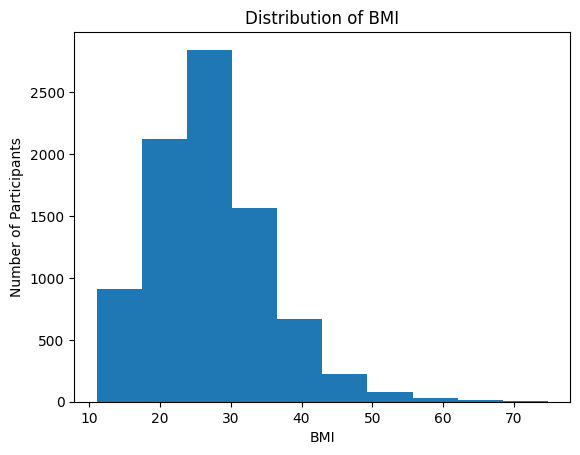

In [3]:
# This creates a histogram of BMI (Body Mass Index)
# A histogram shows the distribution of a numerical variable
df['bmi'].hist()

# Add a title to make the graph more clear
plt.title('Distribution of BMI')

# Label the x-axis
plt.xlabel('BMI')

# Label the y-axis
plt.ylabel('Number of Participants')

# Remove gridlines for a cleaner look
plt.grid(False)

# Display the plot
plt.show()

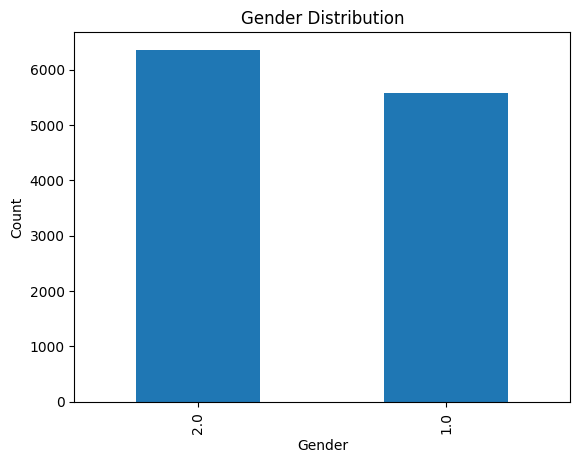

In [4]:
# value_counts() counts how many times each category appears
# plot(kind='bar') creates a bar chart
df['gender'].value_counts().plot(kind='bar')

# Add a title
plt.title('Gender Distribution')

# Label axes
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

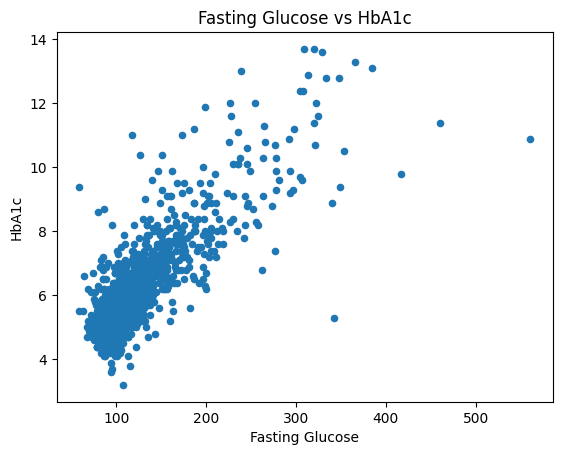

In [5]:
# This creates a scatter plot comparing fasting glucose and hba1c
# Scatter plots show relationships between two numerical variables
df.plot(x='fasting_glucose', y='hba1c', kind='scatter')

# Add title and labels
plt.title('Fasting Glucose vs HbA1c')
plt.xlabel('Fasting Glucose')
plt.ylabel('HbA1c')

plt.show()

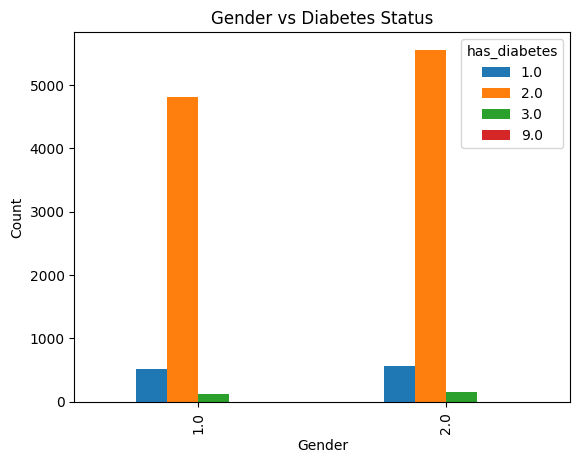

In [6]:
# pd.crosstab creates a frequency table between two categorical variables
# Here we compare gender and diabetes status
pd.crosstab(df['gender'], df['has_diabetes']).plot(kind='bar')

plt.title('Gender vs Diabetes Status')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

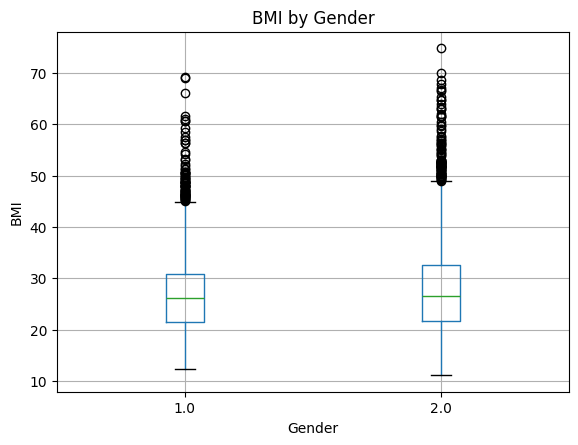

In [7]:
# A boxplot shows distribution and spread of a numerical variable across categories
# Here we compare BMI across gender
df.boxplot(column='bmi', by='gender')

plt.title('BMI by Gender')
plt.suptitle('')  # Removes automatic extra title
plt.xlabel('Gender')
plt.ylabel('BMI')

plt.show()

In [8]:
# Import seaborn for more advanced statistical visualizations
import seaborn as sns

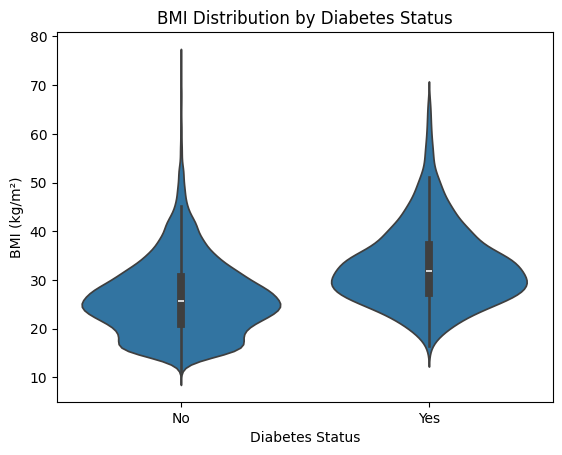

In [9]:
# Filter dataset to only include Yes (1) and No (2) diabetes responses
df_diabetes = df[df['has_diabetes'].isin([1, 2])].copy()

# Create a dictionary to map numbers to readable labels
diabetes_map = {1: 'Yes', 2: 'No'}

# Replace numeric values with readable labels
df_diabetes['has_diabetes'] = df_diabetes['has_diabetes'].map(diabetes_map)

# Create violin plot
# A violin plot shows distribution shape and density
sns.violinplot(data=df_diabetes, x='has_diabetes', y='bmi')

plt.title('BMI Distribution by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('BMI (kg/m²)')

plt.show()

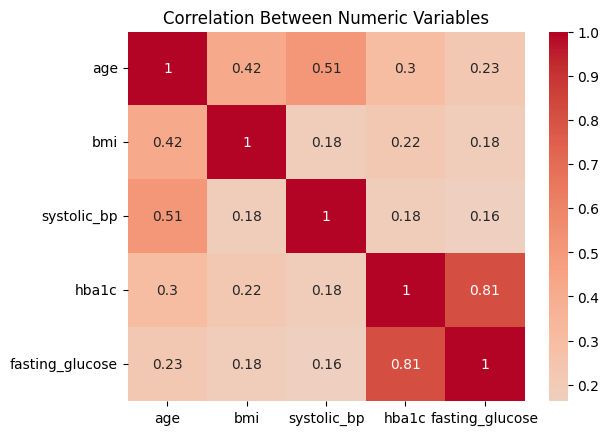

In [10]:
# Select only numeric columns and calculate correlation
numeric_cols = df[['age', 'bmi', 'systolic_bp', 'hba1c', 'fasting_glucose']].corr()

# Create heatmap to visualize correlation strength
sns.heatmap(numeric_cols, annot=True, cmap='coolwarm', center=0)

plt.title('Correlation Between Numeric Variables')

plt.show()

In [12]:
# Import tableone for professional summary tables (commonly used in healthcare research)
import tableone

# Create a descriptive summary table of all variables
tableone.TableOne(df)

ModuleNotFoundError: No module named 'tableone'

In [13]:
# This version includes small histogram visuals
tableone.TableOne(df, show_histograms=True)

NameError: name 'tableone' is not defined

In [14]:
# This version treats 'age' as non-normal and displays median instead of mean
tableone.TableOne(df, show_histograms=True, nonnormal=['age'])

NameError: name 'tableone' is not defined